# KNN Regression without sklearn

In [22]:
import numpy as np
a = np.array([2, 2])
b = np.array([4, 4])
np.linalg.norm(a - b)

2.8284271247461903

In [23]:
import pandas as pd
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases"
     "/abalone/abalone.data"
)
abalone = pd.read_csv(url, header=None)

In [24]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [25]:
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]

In [26]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [27]:
abalone = abalone.drop("Sex", axis=1)

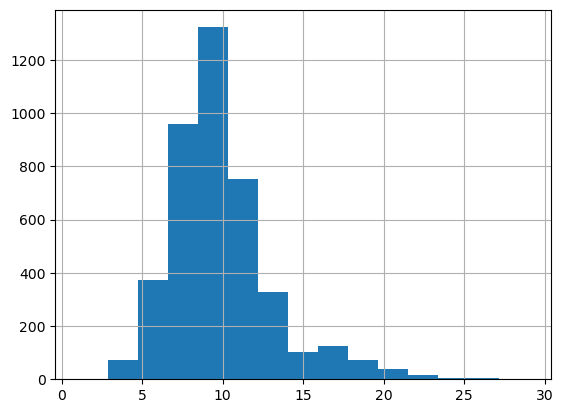

In [28]:
import matplotlib.pyplot as plt
abalone["Rings"].hist(bins=15)
plt.show()

In [29]:
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [30]:
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

In [31]:
new_data_point = np.array([
    0.569552,
    0.446407,
    0.154437,
    1.016849,
    0.439051,
    0.222526,
    0.291208,
])

In [32]:
distances = np.linalg.norm(X - new_data_point, axis=1)

In [33]:
distances

array([0.59739395, 0.9518455 , 0.40573594, ..., 0.20397872, 0.14342627,
       1.10583307])

In [34]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([4045, 1902, 1644])

In [36]:
nearest_neighbor_rings = y[nearest_neighbor_ids]

In [37]:
prediction = nearest_neighbor_rings.mean()

In [38]:
prediction

10.0

# KNN Classification without sklearn

In [39]:
import scipy.stats
class_neighbors = np.array(["A", "B", "B", "C"])
scipy.stats.mode(class_neighbors)

ModeResult(mode=array(['B'], dtype='<U1'), count=array([2]))